In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./pitcher_income.csv')
df

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0
...,...,...,...,...,...,...,...,...,...
151,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0
152,19,신헌민,SSG,6.00,12.0,6,8,2.08,3200.0
153,20,박종훈,SSG,6.19,80.0,60,56,1.71,110000.0
154,22,이기순,SSG,9.00,3.0,4,3,2.33,3100.0


In [3]:
df_all = pd.read_csv('./pitcher_income_all.csv')
df_all

,순위,선수명,팀명,ERA_x,G,W,L,SV,HLD,WPCT,...,NP,AVG,2B,3B,SAC,SF,IBB,WP,BK,salary
0,5,곽빈,두산,2.90,23,12,7,0,0,0.632,...,2229,0.212,18,1,7,4,0,4,1,21000.0
1,6,홍건희,두산,3.06,64,1,5,22,5,0.167,...,1092,0.272,10,3,6,1,3,8,0,30000.0
2,7,박치국,두산,3.59,62,5,3,2,11,0.625,...,923,0.258,9,2,1,0,1,2,0,13000.0
3,8,김명신,두산,3.65,70,3,3,1,24,0.500,...,1445,0.245,18,0,4,3,3,3,0,22500.0
4,9,정철원,두산,3.96,67,7,6,13,11,0.538,...,1254,0.242,6,0,5,3,2,6,1,16500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,15,문승원,SSG,5.23,50,5,8,1,9,0.385,...,1793,0.319,27,1,4,2,1,3,0,80000.0
131,16,이로운,SSG,5.62,50,6,1,0,5,0.857,...,1107,0.289,13,1,3,3,2,3,0,7400.0
132,17,송영진,SSG,5.70,17,3,3,0,0,0.500,...,871,0.257,9,1,4,4,0,8,2,4500.0
133,18,임준섭,SSG,5.79,41,0,2,0,4,0.000,...,666,0.336,6,0,3,1,1,2,0,4000.0


In [5]:
df_corr = df[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary']].corr()

<Axes: >

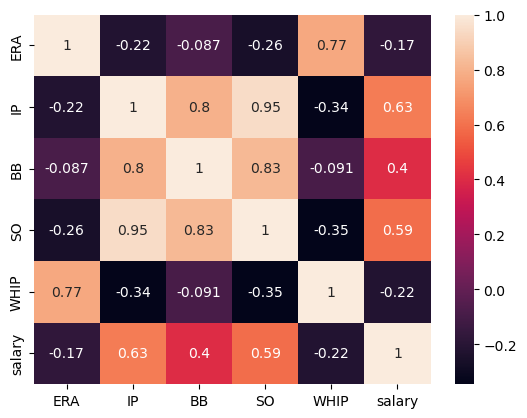

In [7]:
sns.heatmap(df_corr, annot = True)

In [8]:
df_c = df.copy()

In [9]:
df_c['SO/IP'] = df['SO'] / df['IP']

In [10]:
df_c

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889
...,...,...,...,...,...,...,...,...,...,...
151,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500
152,19,신헌민,SSG,6.00,12.0,6,8,2.08,3200.0,0.666667
153,20,박종훈,SSG,6.19,80.0,60,56,1.71,110000.0,0.700000
154,22,이기순,SSG,9.00,3.0,4,3,2.33,3100.0,1.000000


In [12]:
df_c_corr = df_c[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP']].corr()

<Axes: >

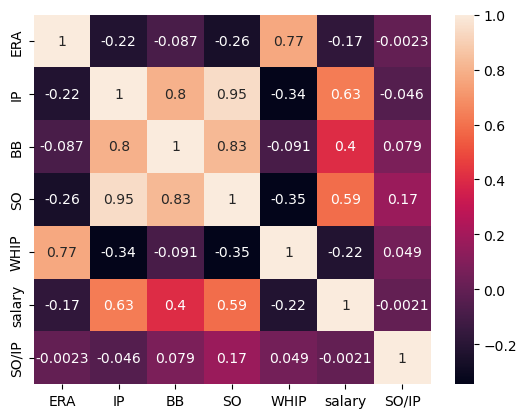

In [13]:
sns.heatmap(df_c_corr, annot = True)

In [14]:
df_G = df_all[['선수명', 'G']]

In [15]:
df_cg = pd.merge(df_c, df_G, on = '선수명', how = 'left')
df_cg

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0
...,...,...,...,...,...,...,...,...,...,...,...
179,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0
180,19,신헌민,SSG,6.00,12.0,6,8,2.08,3200.0,0.666667,NaN
181,20,박종훈,SSG,6.19,80.0,60,56,1.71,110000.0,0.700000,18.0
182,22,이기순,SSG,9.00,3.0,4,3,2.33,3100.0,1.000000,NaN


In [16]:
df_cg.isna().sum()

순위         0
선수명        0
팀명         0
ERA        0
IP         0
BB         0
SO         0
WHIP       0
salary     0
SO/IP      0
G         25
dtype: int64

In [17]:
df_cg_drop = df_cg.dropna()

In [18]:
df_cg_drop

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0
...,...,...,...,...,...,...,...,...,...,...,...
176,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0
177,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0
178,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0
179,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0


In [20]:
df_co = df_cg_drop[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP', 'G']].corr()

<Axes: >

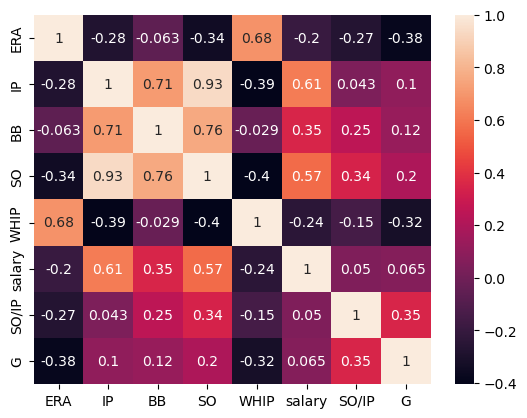

In [21]:
sns.heatmap(df_co, annot = True)

In [22]:
df_cg_drop_c = df_cg_drop.copy()

In [23]:
df_cg_drop_c['IP/G'] = df_cg_drop_c['IP'] / df_cg_drop_c['G']

In [24]:
df_co_c = df_cg_drop_c[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP', 'G', 'IP/G']].corr()

<Axes: >

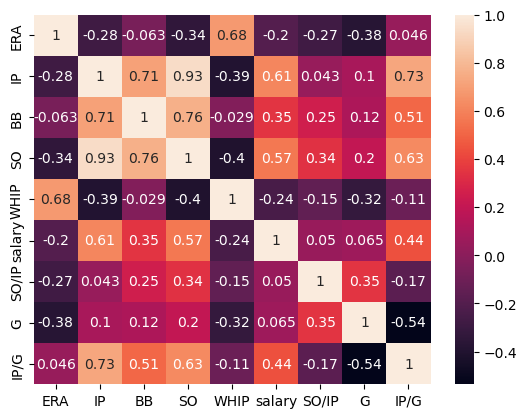

In [25]:
sns.heatmap(df_co_c, annot = True)

In [26]:
df_cg_drop_c

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0,5.521739
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0,0.953125
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0,0.838710
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0,1.128571
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0,1.074627
...,...,...,...,...,...,...,...,...,...,...,...,...
176,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0,2.100000
177,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0,1.140000
178,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0,2.764706
179,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0,0.780488


In [27]:
df_cg_drop_c.to_csv('pitcher_income_eda1.csv', index = False)

In [28]:
df_new = pd.read_csv('./pitcher_income_eda1.csv')
df_new

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0,5.521739
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0,0.953125
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0,0.838710
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0,1.128571
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0,1.074627
...,...,...,...,...,...,...,...,...,...,...,...,...
154,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0,2.100000
155,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0,1.140000
156,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0,2.764706
157,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0,0.780488


In [29]:
df_new_c = df_new.copy()

In [30]:
df_np = df_all[['선수명', 'NP']]

In [31]:
df_new_c_m = pd.merge(df_new_c, df_np, on = '선수명', how = 'left')
df_new_c_m.isna().sum()

순위        0
선수명       0
팀명        0
ERA       0
IP        0
BB        0
SO        0
WHIP      0
salary    0
SO/IP     0
G         0
IP/G      0
NP        0
dtype: int64

In [32]:
df_new_c_m

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G,NP
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0,5.521739,2229
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0,0.953125,1092
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0,0.838710,923
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0,1.128571,1445
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0,1.074627,1254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0,2.100000,1793
379,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0,1.140000,1107
380,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0,2.764706,871
381,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0,0.780488,666


In [33]:
df_new_c_m[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP', 'G', 'IP/G', 'NP']].corr()

,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G,NP
ERA,1.000000,-0.373144,0.237524,-0.337861,0.765252,-0.153327,0.057772,-0.278078,-0.018623,-0.166134
IP,-0.373144,1.000000,0.441473,0.922828,-0.470845,0.577510,-0.110612,0.025767,0.713710,0.896940
BB,0.237524,0.441473,1.000000,0.595840,0.233046,0.302694,0.425544,0.042613,0.376432,0.651667
SO,-0.337861,0.922828,0.595840,1.000000,-0.404054,0.553257,0.230611,0.110167,0.622177,0.892228
WHIP,0.765252,-0.470845,0.233046,-0.404054,1.000000,-0.209248,0.129107,-0.215453,-0.161864,-0.259163
salary,-0.153327,0.577510,0.302694,0.553257,-0.209248,1.000000,0.026966,-0.024079,0.446223,0.532363
SO/IP,0.057772,-0.110612,0.425544,0.230611,0.129107,0.026966,1.000000,0.295066,-0.225139,0.078135
G,-0.278078,0.025767,0.042613,0.110167,-0.215453,-0.024079,0.295066,1.000000,-0.607404,0.045065
IP/G,-0.018623,0.713710,0.376432,0.622177,-0.161864,0.446223,-0.225139,-0.607404,1.000000,0.656482
NP,-0.166134,0.896940,0.651667,0.892228,-0.259163,0.532363,0.078135,0.045065,0.656482,1.000000


In [34]:
df_copy = df_new_c_m.copy()

In [35]:
df_copy

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G,NP
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0,5.521739,2229
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0,0.953125,1092
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0,0.838710,923
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0,1.128571,1445
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0,1.074627,1254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0,2.100000,1793
379,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0,1.140000,1107
380,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0,2.764706,871
381,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0,0.780488,666


In [36]:
df_copy['salary']

0       21000.0
1       30000.0
2       13000.0
3       22500.0
4       16500.0
         ...   
378     80000.0
379      7400.0
380      4500.0
381      4000.0
382    110000.0
Name: salary, Length: 383, dtype: float64

In [37]:
df_copy.describe()

,순위,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G,NP
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,12.603133,4.307050,54.039164,22.887728,41.336815,1.493499,14281.723238,0.770972,48.425587,1.315906,962.216710
std,5.218693,0.976859,23.093732,10.350174,17.963864,0.184186,15671.464385,0.127905,14.964673,1.068221,380.713277
min,1.000000,1.580000,8.000000,4.000000,4.000000,0.840000,3200.000000,0.280702,3.000000,0.515625,173.000000
25%,8.000000,3.600000,43.000000,15.000000,37.000000,1.380000,7000.000000,0.700000,48.000000,0.895833,789.000000
50%,12.000000,4.200000,52.000000,21.000000,40.000000,1.470000,12000.000000,0.769231,48.000000,1.000000,933.000000
75%,17.000000,4.980000,60.000000,29.000000,42.000000,1.620000,17000.000000,0.860465,60.000000,1.250000,1077.000000
max,25.000000,7.500000,174.000000,93.000000,156.000000,2.490000,200000.000000,1.301587,80.000000,6.214286,2798.000000


In [38]:
df_copy['SO/NP'] = df_copy['SO'] / df_copy['NP']

In [43]:
df_copy['NP/G'] = df_copy['NP'] / df_copy['G']

In [44]:
df_copy.columns

Index(['순위', '선수명', '팀명', 'ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP',
       'G', 'IP/G', 'NP', 'SO/NP', 'NP/G'],
      dtype='object')

In [45]:
df_copy_h = df_copy[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP',
       'G', 'IP/G', 'NP', 'SO/NP', 'NP/G']].corr()

<Axes: >

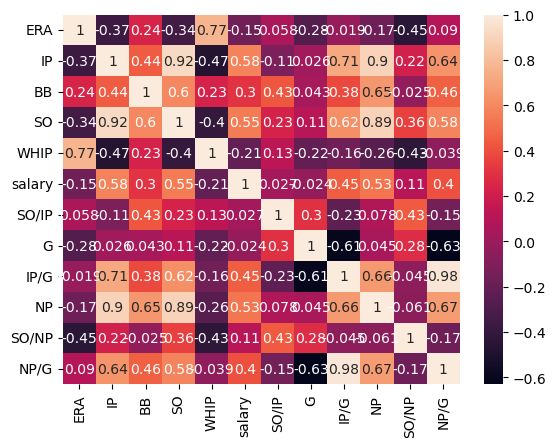

In [46]:
sns.heatmap(df_copy_h, annot = True)

In [47]:
df_copy

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G,NP,SO/NP,NP/G
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0,5.521739,2229,0.047555,96.913043
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0,0.953125,1092,0.056777,17.062500
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0,0.838710,923,0.052004,14.887097
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0,1.128571,1445,0.044983,20.642857
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0,1.074627,1254,0.043860,18.716418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0,2.100000,1793,0.036252,35.860000
379,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0,1.140000,1107,0.046974,22.140000
380,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0,2.764706,871,0.043628,51.235294
381,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0,0.780488,666,0.039039,16.243902


In [48]:
df_copy.describe()

,순위,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G,NP,SO/NP,NP/G
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,12.603133,4.307050,54.039164,22.887728,41.336815,1.493499,14281.723238,0.770972,48.425587,1.315906,962.216710,0.043164,23.393356
std,5.218693,0.976859,23.093732,10.350174,17.963864,0.184186,15671.464385,0.127905,14.964673,1.068221,380.713277,0.008508,18.150483
min,1.000000,1.580000,8.000000,4.000000,4.000000,0.840000,3200.000000,0.280702,3.000000,0.515625,173.000000,0.016967,9.687500
25%,8.000000,3.600000,43.000000,15.000000,37.000000,1.380000,7000.000000,0.700000,48.000000,0.895833,789.000000,0.036124,15.991667
50%,12.000000,4.200000,52.000000,21.000000,40.000000,1.470000,12000.000000,0.769231,48.000000,1.000000,933.000000,0.043296,17.950000
75%,17.000000,4.980000,60.000000,29.000000,42.000000,1.620000,17000.000000,0.860465,60.000000,1.250000,1077.000000,0.049196,22.437500
max,25.000000,7.500000,174.000000,93.000000,156.000000,2.490000,200000.000000,1.301587,80.000000,6.214286,2798.000000,0.075646,97.407407


In [49]:
df_qs = df_all[['선수명', 'QS']]

In [50]:
df_copy_qs = pd.merge(df_copy, df_qs, on = '선수명', how = 'left')

In [51]:
df_copy_qs.columns

Index(['순위', '선수명', '팀명', 'ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP',
       'G', 'IP/G', 'NP', 'SO/NP', 'NP/G', 'QS'],
      dtype='object')

In [52]:
df_qs_corr = df_copy_qs[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP',
       'G', 'IP/G', 'NP', 'SO/NP', 'NP/G', 'QS']].corr()

<Axes: >

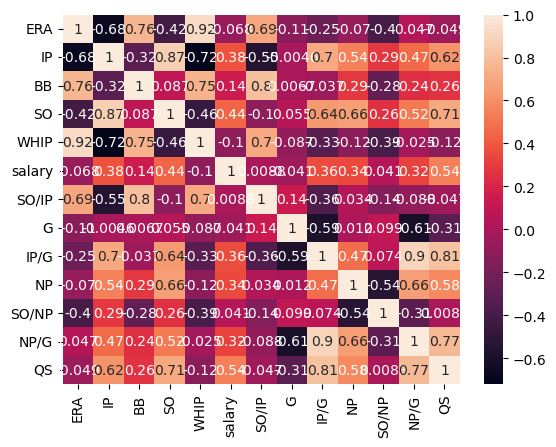

In [53]:
sns.heatmap(df_qs_corr, annot = True)

In [54]:
df_copy_qs

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G,NP,SO/NP,NP/G,QS
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0,5.521739,2229,0.047555,96.913043,13
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0,0.953125,1092,0.056777,17.062500,0
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0,0.838710,923,0.052004,14.887097,0
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0,1.128571,1445,0.044983,20.642857,0
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0,1.074627,1254,0.043860,18.716418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0,2.100000,1793,0.036252,35.860000,4
2171,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0,1.140000,1107,0.046974,22.140000,0
2172,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0,2.764706,871,0.043628,51.235294,1
2173,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0,0.780488,666,0.039039,16.243902,0


In [55]:
df_copy_qs.isna().sum()

순위        0
선수명       0
팀명        0
ERA       0
IP        0
BB        0
SO        0
WHIP      0
salary    0
SO/IP     0
G         0
IP/G      0
NP        0
SO/NP     0
NP/G      0
QS        0
dtype: int64

In [56]:
df_qs

,선수명,QS
0,곽빈,13
1,홍건희,0
2,박치국,0
3,김명신,0
4,정철원,0
...,...,...
130,문승원,4
131,이로운,0
132,송영진,1
133,임준섭,0


In [57]:
df_copy_qs.to_csv('df_qs.csv', index = False)

In [60]:
df_copy_qs.duplicated().value_counts()

True     2032
False     143
Name: count, dtype: int64

In [61]:
df_copy_qs_d = df_copy_qs.drop_duplicates()

In [62]:
df_copy_qs_d

,순위,선수명,팀명,ERA,IP,BB,SO,WHIP,salary,SO/IP,G,IP/G,NP,SO/NP,NP/G,QS
0,5,곽빈,두산,2.90,127.0,58,106,1.21,21000.0,0.834646,23.0,5.521739,2229,0.047555,96.913043,13
1,6,홍건희,두산,3.06,61.0,24,62,1.48,30000.0,1.016393,64.0,0.953125,1092,0.056777,17.062500,0
2,7,박치국,두산,3.59,52.0,21,48,1.42,13000.0,0.923077,62.0,0.838710,923,0.052004,14.887097,0
3,8,김명신,두산,3.65,79.0,27,65,1.25,22500.0,0.822785,70.0,1.128571,1445,0.044983,20.642857,0
4,9,정철원,두산,3.96,72.0,32,55,1.35,16500.0,0.763889,67.0,1.074627,1254,0.043860,18.716418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,15,문승원,SSG,5.23,105.0,35,65,1.65,80000.0,0.619048,50.0,2.100000,1793,0.036252,35.860000,4
2171,16,이로운,SSG,5.62,57.0,29,52,1.66,7400.0,0.912281,50.0,1.140000,1107,0.046974,22.140000,0
2172,17,송영진,SSG,5.70,47.0,31,38,1.63,4500.0,0.808511,17.0,2.764706,871,0.043628,51.235294,1
2173,18,임준섭,SSG,5.79,32.0,19,26,1.93,4000.0,0.812500,41.0,0.780488,666,0.039039,16.243902,0


In [63]:
df_copy_qs_d.columns

Index(['순위', '선수명', '팀명', 'ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP',
       'G', 'IP/G', 'NP', 'SO/NP', 'NP/G', 'QS'],
      dtype='object')

In [64]:
df_corr_qs = df_copy_qs_d[['ERA', 'IP', 'BB', 'SO', 'WHIP', 'salary', 'SO/IP',
       'G', 'IP/G', 'NP', 'SO/NP', 'NP/G', 'QS']].corr()

<Axes: >

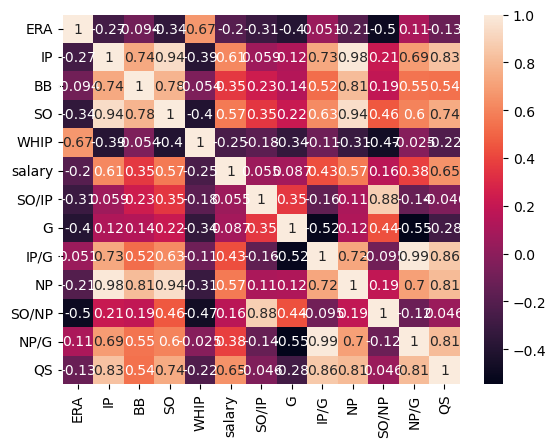

In [65]:
sns.heatmap(df_corr_qs, annot = True)